In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")

In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


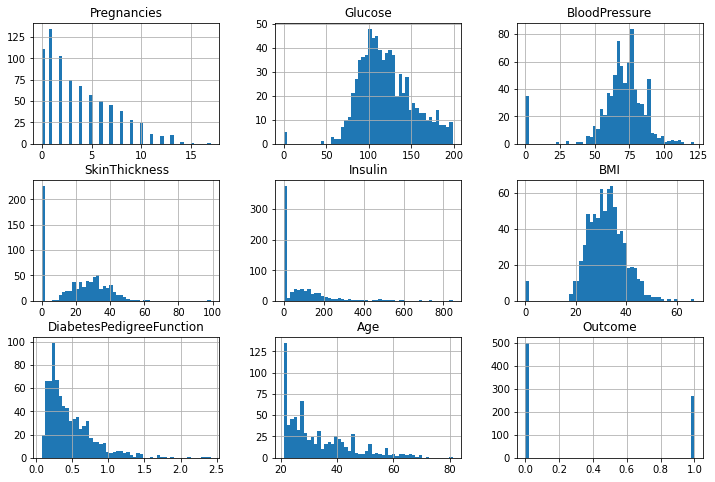

In [5]:
_ = df.hist(figsize=(12,8), bins=50)

In [6]:
split_count = int(df.shape[0] * 0.8)
split_count

614

In [7]:
train = df.loc[:split_count]
train.shape

(615, 9)

In [8]:
test = df.loc[split_count+1:]
test.shape

(153, 9)

In [9]:
label_name = "Outcome"

In [10]:
feature_names=df.columns.tolist()
feature_names.remove(label_name)
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [11]:
X_train=train[feature_names]
print(X_train.shape)
X_train.head()

(615, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(615,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [13]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(153, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50
619,0,119,0,0,0,32.4,0.141,24


In [14]:
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(153,)


615    0
616    0
617    0
618    1
619    1
Name: Outcome, dtype: int64

In [77]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42
                              , max_depth=8
                              , max_features=0.95)
model

DecisionTreeClassifier(max_depth=8, max_features=0.95, random_state=42)

In [78]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_features=0.95, random_state=42)

In [79]:
y_predict = model.predict(X_test)
y_predict[:10]

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [80]:
feature_names[1]

'Glucose'

In [81]:
1 - ((401/614) ** 2) - ((213/614) ** 2)

0.45312417107873837

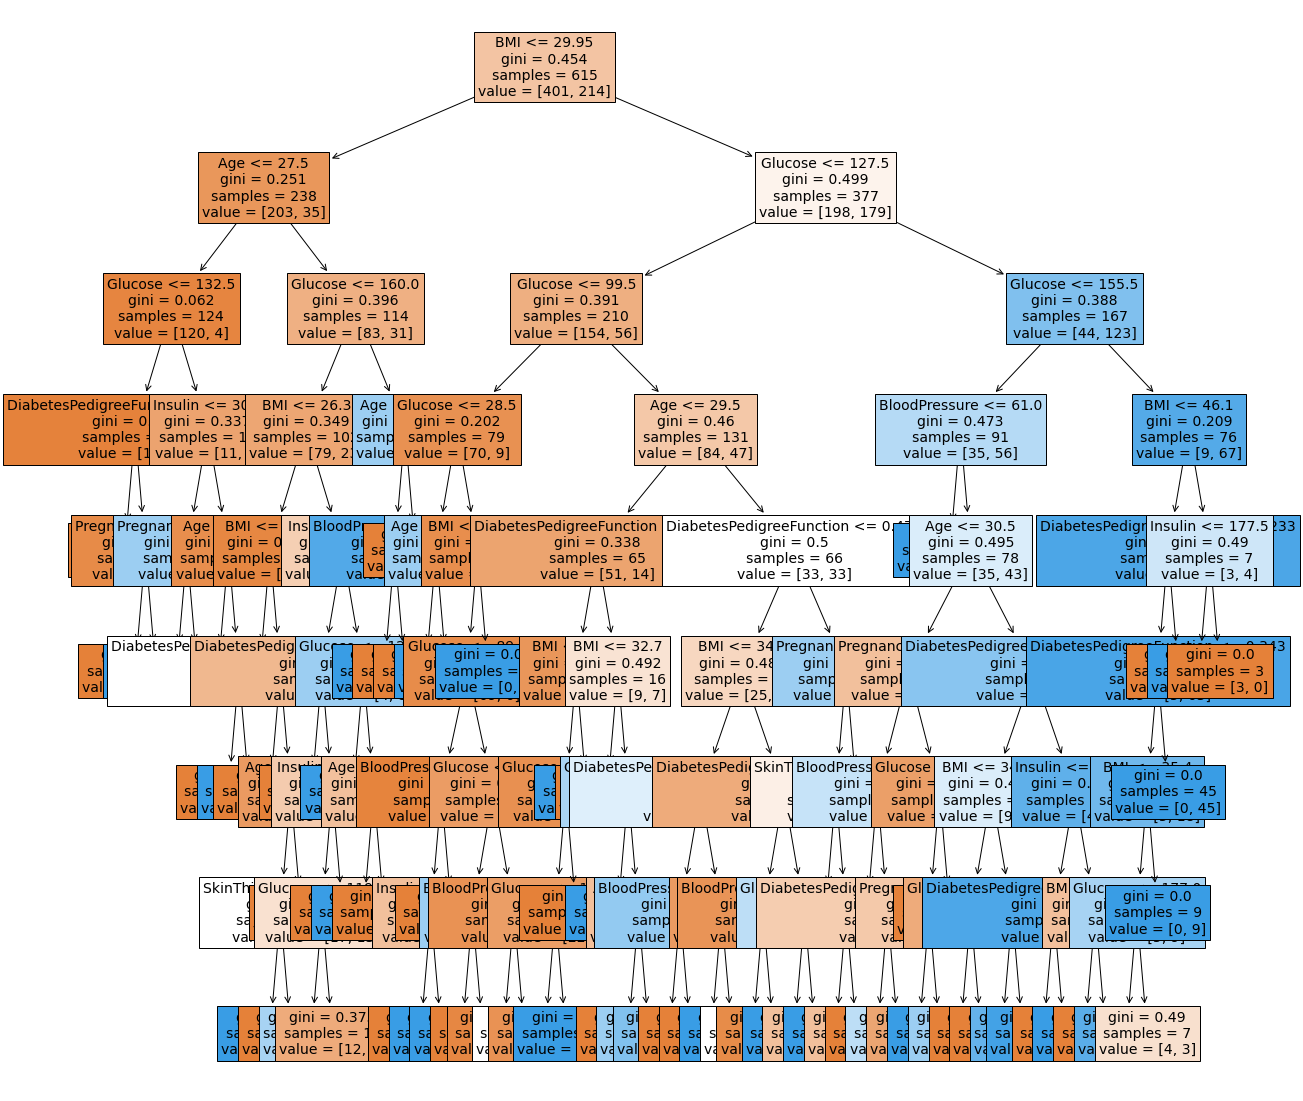

In [82]:

from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(model, filled=True, fontsize=14, feature_names=feature_names)
plt.show()

In [83]:
np.sum(model.feature_importances_)

1.0

In [84]:

model.feature_importances_

array([0.04741491, 0.35419586, 0.05293577, 0.02563585, 0.05381439,
       0.25641041, 0.08483039, 0.12476243])

<AxesSubplot:>

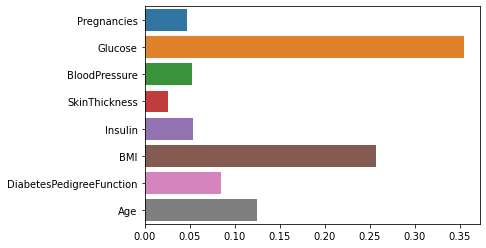

In [85]:

sns.barplot(x=model.feature_importances_ ,y=feature_names)

In [86]:

(y_test == y_predict).mean()*100

73.20261437908496

In [87]:

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

0.7320261437908496

In [88]:
model.score(X_test,y_test)

0.7320261437908496